# 目次

1. データ分析エンジニアの役割（読むだけ）
   1. データ分析の世界
   2. 機械学習の位置づけと流れ
   3. データ分析に使う主なパッケージ
2. Pythonと環境（読むだけ）
   1. 実行環境構築
   2. Pythonの基礎
   3. Jupyter Notebook
3. 数学の基礎（読むだけ）
   1. 数式を読むための基礎知識
   2. 線形代数
   3. 基礎解析
   4. 確率と統計
4. ライブラリによる分析の実践（実装する）
   1. Numpy
   2. pandas
   3. Matplotlib
   4. scikit-learn
5. 応用：データ収集と加工（実装する）
   1. スクレイピング
   2. 自然言語の処理
   3. 画像データの処理

In [2]:
# textbooks sample files directory
notebooks_dir = './notebooks'
data_dir = notebooks_dir + '/data'
# ** tips: Jupyter Notebook でグラフを表示する
import matplotlib.pyplot as plt
%matplotlib inline

## 4. ライブラリによる分析の実践

### 4.1. Numpy

In [3]:
# import
import numpy as np

# make array
a_1d = np.array([1, 2, 3, 4, 5, 6])
a_2d = np.array([[1, 2, 3], [4, 5, 6]])
a_1d_reshaped_to_2d = a_1d.reshape((2, 3))

In [4]:
print(a_1d)
print()
print(a_2d)
print()
print(a_1d_reshaped_to_2d)

[1 2 3 4 5 6]

[[1 2 3]
 [4 5 6]]

[[1 2 3]
 [4 5 6]]


In [5]:
a_2d_raveled_to_1d = a_1d_reshaped_to_2d.ravel()
a_2d_raveled_to_1d # 参照を返す

array([1, 2, 3, 4, 5, 6])

In [6]:
a_2d_flatten_to_1d = a_1d_reshaped_to_2d.flatten()
a_2d_flatten_to_1d # コピーを返す

array([1, 2, 3, 4, 5, 6])

In [7]:
# 数列を返す
# np.arange(size)
print(np.arange(10))
# np.arange(start, end) generated number < end
print(np.arange(1, 11))
# np.arange(start, end, step)
print(np.arange(1, 11, 2))

[0 1 2 3 4 5 6 7 8 9]
[ 1  2  3  4  5  6  7  8  9 10]
[1 3 5 7 9]


In [8]:
# random
f1 = np.random.randint(1, 1000)
f2 = np.random.randint(1, 1000)
print(f1)
print(f2)
# 練習ではシード値を固定（結果を同じ）にすることが多い
# 結果が同じとは、何度試行（複数回呼び出し）しても同じ値になるということである
# 実際はシード値を固定にしない
np.random.seed(123)
f1 = np.random.randint(1, 100)
f2 = np.random.randint(1, 100)
print(f1)
print(f2)

470
136
67
93


In [9]:
# method
# - zeros: 全てゼロ
print(np.zeros((3, 3)), '\n')
# - ones: 全て1
print(np.ones((3, 3)), '\n')
# - eye: 単位行列
print(np.eye(3), '\n')
# - full: 指定の値で埋める
print(np.full((3, 3), 3.14), '\n')
# - linspace: 線形補間 (start, end, split num)
print(np.linspace(0, 1, 5), '\n')
# - diff: 要素間の差分数列を返す
print('a: ', np.array([0, 1, 3, 7, 2]))
print('a.diff: ', np.diff(np.array([0, 1, 3, 7, 2])))

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] 

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

[[3.14 3.14 3.14]
 [3.14 3.14 3.14]
 [3.14 3.14 3.14]] 

[0.   0.25 0.5  0.75 1.  ] 

a:  [0 1 3 7 2]
a.diff:  [ 1  2  4 -5]


In [10]:
# 行列の連結
# 行方向
# np.concatnate([a, b], axis=0)
# np.vstack([a, b])
# 列方向
# np.concatnate([a, b], axis=1)
# np.hstack([a, b])
# ----------------------
a = np.arange(1, 10, 1).reshape((3, 3))
b = np.arange(11, 20, 1).reshape((3, 3))
# ----------------------
ab_vertical_concat = np.concatenate([a, b], axis=0)
print('concat vertical >>')
print(ab_vertical_concat)
ab_vertical_vstack = np.vstack([a, b])
print('vstack vertical >>')
print(ab_vertical_vstack)
# ----------------------
ab_horizontal_concat = np.concatenate([a, b], axis=1)
print('concat horizontal >>')
print(ab_horizontal_concat)
ab_horizontal_hstack = np.hstack([a, b])
print('hstack horizontal >>')
print(ab_horizontal_hstack)

concat vertical >>
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [11 12 13]
 [14 15 16]
 [17 18 19]]
vstack vertical >>
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [11 12 13]
 [14 15 16]
 [17 18 19]]
concat horizontal >>
[[ 1  2  3 11 12 13]
 [ 4  5  6 14 15 16]
 [ 7  8  9 17 18 19]]
hstack horizontal >>
[[ 1  2  3 11 12 13]
 [ 4  5  6 14 15 16]
 [ 7  8  9 17 18 19]]


In [11]:
# 行列の分割
# 行方向の分割：vsplit(src, [n]) > n行分が一つ目の戻り値、二つ目は残りの行
first, second = np.vsplit(a, [2])
print('vsplit a > 2row, else >>')
print(first)
print(second)
# 列方向の分割：hsplit(src, [n]) > n列分が一つ目の戻り値、二つ目は残りの列
first, second = np.hsplit(a, [2])
print('hsplit a > 2clm, else >>')
print(first)
print(second)

vsplit a > 2row, else >>
[[1 2 3]
 [4 5 6]]
[[7 8 9]]
hsplit a > 2clm, else >>
[[1 2]
 [4 5]
 [7 8]]
[[3]
 [6]
 [9]]


In [12]:
# 転置
print('a is >>')
print(a)
print()
print('transposed a (= a.T) is >>')
print(a.T)

a is >>
[[1 2 3]
 [4 5 6]
 [7 8 9]]

transposed a (= a.T) is >>
[[1 4 7]
 [2 5 8]
 [3 6 9]]


In [13]:
# 次元の追加
# 増やしたい方向（row or col）にnp.newaxisを指定してスライシングする
# 行方向の次元を増やしたい
print('add dim in row >> ')
print(a)
print(a[np.newaxis, :])
# 列方向の次元を増やしたい
print('add dim in col >> ')
print(a)
print(a[:, np.newaxis])

add dim in row >> 
[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[[1 2 3]
  [4 5 6]
  [7 8 9]]]
add dim in col >> 
[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[[1 2 3]]

 [[4 5 6]]

 [[7 8 9]]]


In [14]:
# グリッドデータの作成（3Dグラフを作る時とか使うこと多い）
# > meshgridが作るものは何？
# > - X座標列とY座標列から、それらを組み合わせて出来る全ての座標データを生成する
# > - x = (1, 2, 3), y = (1, 2, 3) を入力とすると
# > - [(1, 1), (2, 1), ... , (2, 3), (3, 3)] を作る
# > - 具体的な出力は上記のX座標値とY座標値が別々で出るイメージ
# > - x_grid = [1, 2, 3, 1, 2, 3, 1, ...]
# > - y_grid = [1, 1, 1, 2, 2, 2, 3, ...]
m = np.arange(0, 4)
n = np.arange(4, 7)
x_grid, y_grid = np.meshgrid(m, n)

In [15]:
print('m: {0}\nn: {1}'.format(m, n))
print(' === x_grid === ')
print(x_grid)
print(' === y_grid === ')
print(y_grid)

m: [0 1 2 3]
n: [4 5 6]
 === x_grid === 
[[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]
 === y_grid === 
[[4 4 4 4]
 [5 5 5 5]
 [6 6 6 6]]


In [16]:
# ===============================================================
# Universal Function
# Numpyの強力な機能の一つ。全要素に対する様々な一括処理メソッド
# 中身はCなので高速
# 1. np.abs(arr) * 試しに処理時間を計算する
# 2. np.sin(arr)
# 3. np.cos(arr)
# 4. np.log(arr) <-- ln
# 5. np.log10(arr)
# 6. np.exp(arr) ... etc
# *** timer cell: https://qiita.com/mgsk_2/items/437656b8ce42c03e41a6
sample_arr = np.arange(-50000, 70000).reshape((300, 400))
sample_arr

array([[-50000, -49999, -49998, ..., -49603, -49602, -49601],
       [-49600, -49599, -49598, ..., -49203, -49202, -49201],
       [-49200, -49199, -49198, ..., -48803, -48802, -48801],
       ...,
       [ 68800,  68801,  68802, ...,  69197,  69198,  69199],
       [ 69200,  69201,  69202, ...,  69597,  69598,  69599],
       [ 69600,  69601,  69602, ...,  69997,  69998,  69999]])

In [17]:
%%timeit
sample_2dlist = sample_arr.tolist()
absoluted = []
for i, values in enumerate(sample_2dlist):
    absoluted.append([])
    for val in values:
        absoluted[i].append(abs(val))
absoluted

32.7 ms ± 1.88 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [18]:
%%timeit
np.abs(sample_arr)

104 µs ± 3.33 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [19]:
# ===============================================================
# Broadcast
# Numpyの強力な機能の一つ。四則演算の算術演算子を記述するだけで
# 高速に全要素に対して、要素ごとに算術演算を実行する
# +, -, /, *, **

In [20]:
%%timeit
sample_2dlist = sample_arr.tolist()
added3 = []
for i, values in enumerate(sample_2dlist):
    added3.append([])
    for val in values:
        
        added3[i].append(val + 3)
added3

30.1 ms ± 1.62 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [21]:
%%timeit
sample_arr + 3

54.5 µs ± 1.73 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [22]:
#========================================
# dot product
# 行列の積（内積）
# 以前は、np.dot(b, a)
# Python3.5以降は、b @ a
a = np.arange(1, 10).reshape((3, 3))
b = np.arange(11, 20).reshape((3, 3))
c = b @ a
print('a = \n', a)
print('b = \n', b)
print('c = \n', c)

a = 
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
b = 
 [[11 12 13]
 [14 15 16]
 [17 18 19]]
c = 
 [[150 186 222]
 [186 231 276]
 [222 276 330]]


In [23]:
# =====================================
# 判定・論理値
# a < b >> [True, False, True] みたいな行列を返す
# これを応用して、「ある条件を満たす要素のみ取得/カウントする」などが良く使われる
# - 正の要素数を取得する
# Case1 np.sum()＋論理値行列＝条件を満たす要素の数を取得する
nonzero_num = np.count_nonzero(sample_arr > 0)
true_num = np.sum(sample_arr > 0)
print('nonzero num : ', nonzero_num, '\ntrue_num : ', true_num)
# Case2 np.any()＋論理値行列＝条件を満たす要素が少なくとも一つあるかどうか判定する
plus_exists = np.any(sample_arr > 0)
print('plus element exists ? : ', plus_exists)
# Case3 np.allclose()＝二つの行列の全要素間の差が規定の誤差以内か？（近似）
sample_arr = sample_arr.astype(float)
sample_arr_ = sample_arr + 0.001
close_001 = np.allclose(sample_arr, sample_arr_, atol=0.01)
close_00001 = np.allclose(sample_arr, sample_arr_, atol=0.0001)
print('sample_arr is all close to sample_arr_?(delta<0.01)', close_001)
print('sample_arr is all close to sample_arr_?(delta<0.0001)', close_00001)

nonzero num :  69999 
true_num :  69999
plus element exists ? :  True
sample_arr is all close to sample_arr_?(delta<0.01) True
sample_arr is all close to sample_arr_?(delta<0.0001) False


### 4.2. pandas

In [24]:
import pandas as pd
df = pd.DataFrame(np.arange(12).reshape((4, 3)), columns=['A', 'B', 'C'], index=['1', '2', '3', '4'])
df

,A,B,C
1,0,1,2
2,3,4,5
3,6,7,8
4,9,10,11


In [25]:
# 様々な抽出
# スライシングとloc, ilocメソッド
# 1. カラム名を指定する
print('df[\'A\'] = \n{0}'.format(df['A']))
print('df[[\'A\', \'B\']] = \n{0}'.format(df[['A', 'B']]))
# 2. 行を指定する
print('df[:2] = \n{0}'.format(df[:2]))
print('df[2:4] = \n{0}'.format(df[2:4]))
# 3. locメソッド ==> 「index名とcolumn名」
print('df.loc[:,[\'A\', \'B\']] = \n{0}'.format(df.loc[:,['A', 'B']]))
print('df.loc[[\'2\', \'3\', \'4\'],[\'A\', \'B\']] = \n{0}'.format(df.loc[['2', '3', '4'],['A', 'B']]))
# 4. ilocメソッド ==> 「index番号とcolumn番号」番号は0始まり, (*index location)
print('df.iloc[:,[0, 1]] = \n{0}'.format(df.iloc[:,[0, 1]]))
print('df.iloc[[1, 2, 3],[0, 1]] = \n{0}'.format(df.iloc[[1, 2, 3],[0, 1]]))
print('df.iloc[2:,[0, 1]] = \n{0}'.format(df.iloc[2:,[0, 1]]))

df['A'] = 
1    0
2    3
3    6
4    9
Name: A, dtype: int64
df[['A', 'B']] = 
   A   B
1  0   1
2  3   4
3  6   7
4  9  10
df[:2] = 
   A  B  C
1  0  1  2
2  3  4  5
df[2:4] = 
   A   B   C
3  6   7   8
4  9  10  11
df.loc[:,['A', 'B']] = 
   A   B
1  0   1
2  3   4
3  6   7
4  9  10
df.loc[['2', '3', '4'],['A', 'B']] = 
   A   B
2  3   4
3  6   7
4  9  10
df.iloc[:,[0, 1]] = 
   A   B
1  0   1
2  3   4
3  6   7
4  9  10
df.iloc[[1, 2, 3],[0, 1]] = 
   A   B
2  3   4
3  6   7
4  9  10
df.iloc[2:,[0, 1]] = 
   A   B
3  6   7
4  9  10


In [26]:
# FILE IO
# 1. read csv
df = pd.read_csv(data_dir + '/201704health.csv', encoding='utf-8')
print('csv df')
print(df.head(10))
# 2. read excel
df = pd.read_excel(data_dir + '/201704health.xlsx')
print('excel df')
print(df.head(10))
# 3. read html table (webページのtable要素を読み込む)
url = 'https://ja.wikipedia.org/wiki/%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%B0%E8%A8%80%E8%AA%9E'
tables = pd.read_html(url)
df = tables[2]
print('html table df')
print(df)
# 4. to csv
# 5. to excel
# 6. pickle (to pickle, read pickle)
#   > python標準のオブジェクト格納用バイナリファイル
#   > read_pickle(), to_pickle() で実行する

csv df
           日付     歩数  摂取カロリー
0  2017-04-01   5439    2500
1  2017-04-02   2510    2300
2  2017-04-03  10238    1950
3  2017-04-04   8209    1850
4  2017-04-05   9434    1930
5  2017-04-06   7593    1800
6  2017-04-07   9320    1940
7  2017-04-08   4873    2300
8  2017-04-09  12045    1950
9  2017-04-10   7493    1850
excel df
           日付     歩数  摂取カロリー
0  2017-04-01   5439    2500
1  2017-04-02   2510    2300
2  2017-04-03  10238    1950
3  2017-04-04   8209    1850
4  2017-04-05   9434    1930
5  2017-04-06   7593    1800
6  2017-04-07   9320    1940
7  2017-04-08   4873    2300
8  2017-04-09  12045    1950
9  2017-04-10   7493    1850
html table df
                                                    0  \
0   表話編歴コンピュータ・プログラミング言語低水準言語 機械語 アセンブリ言語 高水準言語 19...   
1                                表話編歴コンピュータ・プログラミング言語   
2                                               低水準言語   
3                                               高水準言語   
4                                              

In [27]:
# =======================================
# Data Arrangement データの整形
# =======================================

In [28]:
df = pd.read_excel(data_dir + '/201704health.xlsx')
df

,日付,歩数,摂取カロリー
0,2017-04-01,5439,2500
1,2017-04-02,2510,2300
2,2017-04-03,10238,1950
3,2017-04-04,8209,1850
4,2017-04-05,9434,1930
5,2017-04-06,7593,1800
6,2017-04-07,9320,1940
7,2017-04-08,4873,2300
8,2017-04-09,12045,1950
9,2017-04-10,7493,1850


In [29]:
# 歩数が10000以上の日だけ抽出
# 論理演算子をシンプルに使う方法
df_selected = df[df['歩数'] >= 10000]
df_selected

,日付,歩数,摂取カロリー
2,2017-04-03,10238,1950
8,2017-04-09,12045,1950
12,2017-04-13,10287,1800
19,2017-04-20,15328,1800
20,2017-04-21,12849,1940


In [30]:
# queryメソッドを使う方法 (個人的にはこちらの方が好き) 変数を使う場合は@をつける
df_selected = df.query('歩数 >= 10000')
df_selected

,日付,歩数,摂取カロリー
2,2017-04-03,10238,1950
8,2017-04-09,12045,1950
12,2017-04-13,10287,1800
19,2017-04-20,15328,1800
20,2017-04-21,12849,1940


In [31]:
thresh = 10000
df_selected = df.query('歩数 >= @thresh')
df_selected

,日付,歩数,摂取カロリー
2,2017-04-03,10238,1950
8,2017-04-09,12045,1950
12,2017-04-13,10287,1800
19,2017-04-20,15328,1800
20,2017-04-21,12849,1940


In [32]:
# 型を確認
df.dtypes

日付        object
歩数         int64
摂取カロリー     int64
dtype: object

In [33]:
# 日付がobjectになっている。datetime型にする
df['date'] = df['日付'].apply(pd.to_datetime)  # apply(func) コールバック関数を実行
df

,日付,歩数,摂取カロリー,date
0,2017-04-01,5439,2500,2017-04-01
1,2017-04-02,2510,2300,2017-04-02
2,2017-04-03,10238,1950,2017-04-03
3,2017-04-04,8209,1850,2017-04-04
4,2017-04-05,9434,1930,2017-04-05
5,2017-04-06,7593,1800,2017-04-06
6,2017-04-07,9320,1940,2017-04-07
7,2017-04-08,4873,2300,2017-04-08
8,2017-04-09,12045,1950,2017-04-09
9,2017-04-10,7493,1850,2017-04-10


In [34]:
# データ型を再度確認
df.dtypes

日付                object
歩数                 int64
摂取カロリー             int64
date      datetime64[ns]
dtype: object

In [35]:
# 摂取カロリーをfloat型にする
df['摂取カロリー'] = df['摂取カロリー'].astype(np.float32)
df

,日付,歩数,摂取カロリー,date
0,2017-04-01,5439,2500.0,2017-04-01
1,2017-04-02,2510,2300.0,2017-04-02
2,2017-04-03,10238,1950.0,2017-04-03
3,2017-04-04,8209,1850.0,2017-04-04
4,2017-04-05,9434,1930.0,2017-04-05
5,2017-04-06,7593,1800.0,2017-04-06
6,2017-04-07,9320,1940.0,2017-04-07
7,2017-04-08,4873,2300.0,2017-04-08
8,2017-04-09,12045,1950.0,2017-04-09
9,2017-04-10,7493,1850.0,2017-04-10


In [36]:
# dateをindexとして設定
df = df.set_index('date')
df.head()

,日付,歩数,摂取カロリー
date,,,
2017-04-01,2017-04-01,5439,2500.0
2017-04-02,2017-04-02,2510,2300.0
2017-04-03,2017-04-03,10238,1950.0
2017-04-04,2017-04-04,8209,1850.0
2017-04-05,2017-04-05,9434,1930.0


In [37]:
# 歩数でソート
df.sort_values(by='歩数')

,日付,歩数,摂取カロリー
date,,,
2017-04-02,2017-04-02,2510,2300.0
2017-04-23,2017-04-23,3890,1950.0
2017-04-22,2017-04-22,4029,2300.0
2017-04-30,2017-04-30,4093,1950.0
2017-04-08,2017-04-08,4873,2300.0
2017-04-01,2017-04-01,5439,2500.0
2017-04-29,2017-04-29,6033,2300.0
2017-04-12,2017-04-12,6481,2300.0
2017-04-27,2017-04-27,7203,1930.0


In [38]:
# 不要なカラムの削除
df = df.drop('日付', axis=1)
df

,歩数,摂取カロリー
date,,
2017-04-01,5439,2500.0
2017-04-02,2510,2300.0
2017-04-03,10238,1950.0
2017-04-04,8209,1850.0
2017-04-05,9434,1930.0
2017-04-06,7593,1800.0
2017-04-07,9320,1940.0
2017-04-08,4873,2300.0
2017-04-09,12045,1950.0


In [39]:
# 組み合わせデータの挿入
# 新たに 歩数/カロリー を計算し、カラムを追加する
df['歩数 / カロリー'] = df['歩数'] / df['摂取カロリー']
df

,歩数,摂取カロリー,歩数 / カロリー
date,,,
2017-04-01,5439,2500.0,2.175600
2017-04-02,2510,2300.0,1.091304
2017-04-03,10238,1950.0,5.250256
2017-04-04,8209,1850.0,4.437297
2017-04-05,9434,1930.0,4.888083
2017-04-06,7593,1800.0,4.218333
2017-04-07,9320,1940.0,4.804124
2017-04-08,4873,2300.0,2.118696
2017-04-09,12045,1950.0,6.176923


In [40]:
# 歩数/カロリー の値を3つに分類する 運動指数 カラムを作る
# 運動指数計算関数
def exercise_judge(ex: float):
    if ex <= 3.0:
        return 'Low'
    elif 3.0 < ex <= 6.0:
        return 'Mid'
    else:
        return 'High'
# applyメソッドで全要素に対して一括実行
df['運動指数'] = df['歩数 / カロリー'].apply(exercise_judge)
df

,歩数,摂取カロリー,歩数 / カロリー,運動指数
date,,,,
2017-04-01,5439,2500.0,2.175600,Low
2017-04-02,2510,2300.0,1.091304,Low
2017-04-03,10238,1950.0,5.250256,Mid
2017-04-04,8209,1850.0,4.437297,Mid
2017-04-05,9434,1930.0,4.888083,Mid
2017-04-06,7593,1800.0,4.218333,Mid
2017-04-07,9320,1940.0,4.804124,Mid
2017-04-08,4873,2300.0,2.118696,Low
2017-04-09,12045,1950.0,6.176923,High


In [41]:
# この情報を一旦保存
path_df_shaped_pickle = data_dir + '/df_shaped_201704health.pickle'
df.to_pickle(path_df_shaped_pickle)

In [42]:
# One-hot encoding する
# 日付ごとに運動指数のOne-hotベクターを作る
df_moved = pd.get_dummies(df['運動指数'], prefix='運動')
df_moved

,運動_High,運動_Low,運動_Mid
date,,,
2017-04-01,0,1,0
2017-04-02,0,1,0
2017-04-03,0,0,1
2017-04-04,0,0,1
2017-04-05,0,0,1
2017-04-06,0,0,1
2017-04-07,0,0,1
2017-04-08,0,1,0
2017-04-09,1,0,0


In [43]:
# 一旦保存
path_df_moved_pickle = data_dir + '/df_201704moved.pickle'
df_moved.to_pickle(path_df_moved_pickle)

In [44]:
# ==========================================
# 時系列データ分析
# ==========================================
# 1ヶ月分のデータを作る
dates = pd.date_range(start='2017-04-01', end='2017-04-30')
dates

DatetimeIndex(['2017-04-01', '2017-04-02', '2017-04-03', '2017-04-04',
               '2017-04-05', '2017-04-06', '2017-04-07', '2017-04-08',
               '2017-04-09', '2017-04-10', '2017-04-11', '2017-04-12',
               '2017-04-13', '2017-04-14', '2017-04-15', '2017-04-16',
               '2017-04-17', '2017-04-18', '2017-04-19', '2017-04-20',
               '2017-04-21', '2017-04-22', '2017-04-23', '2017-04-24',
               '2017-04-25', '2017-04-26', '2017-04-27', '2017-04-28',
               '2017-04-29', '2017-04-30'],
              dtype='datetime64[ns]', freq='D')

In [45]:
# データ自体は乱数を使う(本書では seed=123というルールにしている) 
np.random.seed(123)
df = pd.DataFrame(np.random.randint(1, 31, 30), index=dates, columns=['乱数'])
df

,乱数
2017-04-01,14
2017-04-02,3
2017-04-03,29
2017-04-04,3
2017-04-05,7
2017-04-06,18
2017-04-07,20
2017-04-08,11
2017-04-09,28
2017-04-10,26


In [46]:
# 1年分（365日）のデータを作る
dates = pd.date_range(start='2017-01-01', periods=365)
dates

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [47]:
df = pd.DataFrame(np.random.randint(1, 31, 365), index=dates, columns=['乱数'])
df

,乱数
2017-01-01,4
2017-01-02,3
2017-01-03,21
2017-01-04,8
2017-01-05,3
...,...
2017-12-27,8
2017-12-28,24
2017-12-29,22
2017-12-30,20


In [48]:
# 月平均のデータにする
# point1: groupby().mean()
# point2: pd.Grouper(freq='X')で周期的なグルーピングをする
# ** pd.Grouperについては、https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html
df_mean_per_month = df.groupby(pd.Grouper(freq='M')).mean()
df_mean_per_month

,乱数
2017-01-31,12.741935
2017-02-28,15.892857
2017-03-31,15.806452
2017-04-30,14.900000
2017-05-31,14.741935
2017-06-30,15.433333
2017-07-31,15.645161
2017-08-31,18.645161
2017-09-30,14.333333
2017-10-31,12.935484


In [49]:
# -------------
# * 時系列データにおけるリサンプリング2種
# ** アップサンプリング：より高い頻度で再度サンプリングすること > DataFrame.asfreq('', kwargs)
# ** ダウンサンプリング：より低い頻度で再度サンプリングすること > DataFrame.resample().method()
# -------------
# 引数のカラムを乱数に固定して、resampleメソッドを使って
# 毎月の平均値を出力する
df['乱数'].resample('1M').mean()

2017-01-31    12.741935
2017-02-28    15.892857
2017-03-31    15.806452
2017-04-30    14.900000
2017-05-31    14.741935
2017-06-30    15.433333
2017-07-31    15.645161
2017-08-31    18.645161
2017-09-30    14.333333
2017-10-31    12.935484
2017-11-30    17.800000
2017-12-31    14.000000
Freq: M, Name: 乱数, dtype: float64

In [50]:
# 1年分の土曜日のデータを作る
pd.date_range(start='2017-01-01', end='2017-12-31', freq='W-SAT')

DatetimeIndex(['2017-01-07', '2017-01-14', '2017-01-21', '2017-01-28',
               '2017-02-04', '2017-02-11', '2017-02-18', '2017-02-25',
               '2017-03-04', '2017-03-11', '2017-03-18', '2017-03-25',
               '2017-04-01', '2017-04-08', '2017-04-15', '2017-04-22',
               '2017-04-29', '2017-05-06', '2017-05-13', '2017-05-20',
               '2017-05-27', '2017-06-03', '2017-06-10', '2017-06-17',
               '2017-06-24', '2017-07-01', '2017-07-08', '2017-07-15',
               '2017-07-22', '2017-07-29', '2017-08-05', '2017-08-12',
               '2017-08-19', '2017-08-26', '2017-09-02', '2017-09-09',
               '2017-09-16', '2017-09-23', '2017-09-30', '2017-10-07',
               '2017-10-14', '2017-10-21', '2017-10-28', '2017-11-04',
               '2017-11-11', '2017-11-18', '2017-11-25', '2017-12-02',
               '2017-12-09', '2017-12-16', '2017-12-23', '2017-12-30'],
              dtype='datetime64[ns]', freq='W-SAT')

In [51]:
# 元の入力から毎週土曜日を区切りとしたまとまりのデータにする
df_year = pd.DataFrame(df.groupby(pd.Grouper(freq='W-SAT')).sum(), columns=['乱数'])
df_year

,乱数
2017-01-07,76
2017-01-14,123
2017-01-21,132
2017-01-28,48
2017-02-04,91
2017-02-11,123
2017-02-18,113
2017-02-25,89
2017-03-04,135
2017-03-11,115


In [52]:
# 欠損値を含むデータ読み込み
# ** tips: index_colでindexのカラム名を指定している
# ** tips: parse_date=True で日付文字列をdatetime型にパースしている
df_201705 = pd.read_csv(data_dir + '/201705health.csv', encoding='utf-8', index_col='日付', parse_dates=True)
print('df_201705 = ')
print(df_201705)
# ====================================
# 欠損値（NaN）処理
# 1. 取り除く = dropna()
# 2. ???で埋める = fillna(???)
# ====================================
# 1. 取り除く
df_201705_drop = df_201705.dropna()
print('df_201705_drop = ')
print(df_201705_drop)
# 2.1. 0で埋める
df_201705_fillna = df_201705.fillna(0)
print('fill na with 0')
print(df_201705_fillna)
# 2.2. 手前の値で埋める
df_201705_fillna = df_201705.fillna(method='ffill')
print('fill na with front value')
print(df_201705_fillna)
# 2.3. 全体の平均値,中央値や最頻値で埋める
df_201705_fillna = df_201705.fillna(df_201705.mean())  # 平均値
print('fill na with Mean')
print(df_201705_fillna)
df_201705_fillna = df_201705.fillna(df_201705.median())  # 中央値
print('fill na with Median')
print(df_201705_fillna)
df_201705_fillna = df_201705.fillna(df_201705.mode().iloc[0,:])  # 最頻値
print('fill na with Mode')
print(df_201705_fillna)

df_201705 = 
                歩数  摂取カロリー
日付                        
2017-05-01  1439.0  4500.0
2017-05-02  8120.0  2420.0
2017-05-03     NaN     NaN
2017-05-04  2329.0  1500.0
2017-05-05     NaN     NaN
2017-05-06  3233.0  1800.0
2017-05-07  9593.0  2200.0
2017-05-08  9213.0  1800.0
2017-05-09  5593.0  2500.0
df_201705_drop = 
                歩数  摂取カロリー
日付                        
2017-05-01  1439.0  4500.0
2017-05-02  8120.0  2420.0
2017-05-04  2329.0  1500.0
2017-05-06  3233.0  1800.0
2017-05-07  9593.0  2200.0
2017-05-08  9213.0  1800.0
2017-05-09  5593.0  2500.0
fill na with 0
                歩数  摂取カロリー
日付                        
2017-05-01  1439.0  4500.0
2017-05-02  8120.0  2420.0
2017-05-03     0.0     0.0
2017-05-04  2329.0  1500.0
2017-05-05     0.0     0.0
2017-05-06  3233.0  1800.0
2017-05-07  9593.0  2200.0
2017-05-08  9213.0  1800.0
2017-05-09  5593.0  2500.0
fill na with front value
                歩数  摂取カロリー
日付                        
2017-05-01  1439.0  4500.0
2017-05-02 

In [53]:
# (前処理)以前保存した4月分の健康データと運動指数（one-hot）を読み込む
df = pd.read_pickle(path_df_shaped_pickle)
df_moved = pd.read_pickle(path_df_moved_pickle)
print(df.head(3))
print(df_moved.head(3))
# ====================================
# データの連結
# ====================================
# 4月分の健康基本データと運動指数データを列方向(axis=1)に連結する
df_merged = pd.concat([df, df_moved], axis=1)
print('df_merged: April(health + moved)')
print(df_merged)
# 5月分の健康基本データを行方向(axis=0)に連結する
# ** 5月分の運動指数データはないのでNaNで埋められる
df_merged_0405 = pd.concat([df_merged, df_201705_fillna], axis=0, sort=True)
print('df_merged_0405: April(health + moved) + May(health)')
print(df_merged_0405)

               歩数  摂取カロリー  歩数 / カロリー 運動指数
date                                     
2017-04-01   5439  2500.0   2.175600  Low
2017-04-02   2510  2300.0   1.091304  Low
2017-04-03  10238  1950.0   5.250256  Mid
            運動_High  運動_Low  運動_Mid
date                               
2017-04-01        0       1       0
2017-04-02        0       1       0
2017-04-03        0       0       1
df_merged: April(health + moved)
               歩数  摂取カロリー  歩数 / カロリー  運動指数  運動_High  運動_Low  運動_Mid
date                                                               
2017-04-01   5439  2500.0   2.175600   Low        0       1       0
2017-04-02   2510  2300.0   1.091304   Low        0       1       0
2017-04-03  10238  1950.0   5.250256   Mid        0       0       1
2017-04-04   8209  1850.0   4.437297   Mid        0       0       1
2017-04-05   9434  1930.0   4.888083   Mid        0       0       1
2017-04-06   7593  1800.0   4.218333   Mid        0       0       1
2017-04-07   9320  1940.0   4.804

最大値:.max() 2500.0
最小値:.min() 1800.0
平均値:.mean() 2026.6666
中央値:.median() 1945.0
最頻値:.mode() 0    2300.0
dtype: float32
標本標準偏差:.std(ddof=1:default) 205.54944
母集団の標準偏差(の推定値):.std(ddof=0) 202.09459
サンプル数:.count()
 30
代表的な統計量をまとめて算出:.describe()
                  歩数       摂取カロリー  歩数 / カロリー
count     30.000000    30.000000  30.000000
mean    7766.366667  2026.666626   3.929658
std     2689.269308   205.549438   1.563674
min     2510.000000  1800.000000   1.091304
25%     6661.500000  1870.000000   2.921522
50%     7561.000000  1945.000000   4.030762
75%     8408.500000  2300.000000   4.421622
max    15328.000000  2500.000000   8.515556
カラム間の相関係数をまとめて算出:.corr()
                  歩数    摂取カロリー  歩数 / カロリー
歩数         1.000000 -0.498703   0.982828
摂取カロリー    -0.498703  1.000000  -0.636438
歩数 / カロリー  0.982828 -0.636438   1.000000
df.values (convert to ndarray) = 
[[5439 2500.0 2.1756 'Low']
 [2510 2300.0 1.0913043478260869 'Low']
 [10238 1950.0 5.25025641025641 'Mid']
 [8209 1850.0 4.437297297297297 

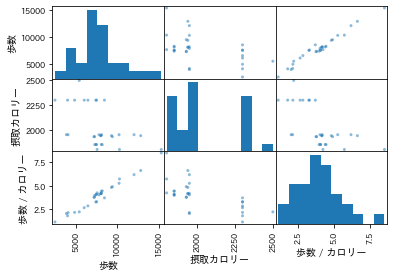

In [54]:
df = pd.read_pickle(path_df_shaped_pickle)
# ====================================
# 統計データの扱い
# ====================================
# 1. 基本統計量の算出
print('最大値:.max()', df['摂取カロリー'].max())
print('最小値:.min()', df['摂取カロリー'].min())
print('平均値:.mean()', df['摂取カロリー'].mean())
print('中央値:.median()', df['摂取カロリー'].median())
print('最頻値:.mode()', df['摂取カロリー'].mode())
print('標本標準偏差:.std(ddof=1:default)', df['摂取カロリー'].std()) # default:ddof=1
print('母集団の標準偏差(の推定値):.std(ddof=0)', df['摂取カロリー'].std(ddof=0))
print('サンプル数:.count()\n', df['摂取カロリー'].count())
# 2. 要約
print('代表的な統計量をまとめて算出:.describe()\n', df.describe())
# 3. (カラム間の)相関係数 > 各特徴量の独立性を考えたりするとき。多重共線性とか
print('カラム間の相関係数をまとめて算出:.corr()\n', df.corr())
# 4. 散布図行列
from pandas.plotting import scatter_matrix
_ = scatter_matrix(df)
# 5. データ変換
#    - MachineLearning系ライブラリではDataFrameを使うこともあれば
#    - ndarray(Numpy)を使うこともある。状況に応じでこれらの相互変換が必要である。
#    DataFrame -> ndarray : DataFrame.values
#    ndarray -> DataFrame : df = pd.DataFrame(ndarray, index=[], columns=[])
#    ** 補足: pandasはnumpyを拡張したもの
df_array = df.values
print('df.values (convert to ndarray) = ')
print(df_array)

### 4.3. Matplotlib

In [55]:
# matplotlibは省略
# - 結構使ったことあるから
# - 分析の中で可視化の必要性が出た時に都度調べれば良いと思うから
# - seabornやplotlyの方が使用頻度は高くなりそうだから

### 4.4. scikit-learn

In [56]:
# ========================================
# 4.4.1. 前処理
# DataFrameの前処理はpandasのメソッドでも実行可能であるが、
# scikit-learnの場合は、classのインスタンス化->fit->transform
# という統一的な記述を可能にする
# ========================================
df_sample = pd.DataFrame({'A': [1, np.nan, 3, 4, 5],
                          'B': [6, 7, 8, np.nan, 10],
                          'C': [11, 12, 13, 14, 15]
                         })
df_sample

,A,B,C
0,1.0,6.0,11
1,NaN,7.0,12
2,3.0,8.0,13
3,4.0,NaN,14
4,5.0,10.0,15


In [57]:
# ----------------------------------------
# 欠損値への対応
# ----------------------------------------
# 欠損値除去: DataFrrame.dropna()
# 欠損値補完: DataFrame.fillna() or sklearn.preprocessing.Imputer (ここでは後者について学ぶ)
from sklearn.impute import SimpleImputer # <-- 0.22.2
#from sklearn.preprocessing import Imputer # <-- latest
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
# ---------------------------
# 平均値で欠損値を補完するインスタンスを作成
imp = SimpleImputer(strategy='mean')
# 欠損値を補完
imp.fit(df_sample)
imp.transform(df_sample)

array([[ 1.  ,  6.  , 11.  ],
       [ 3.25,  7.  , 12.  ],
       [ 3.  ,  8.  , 13.  ],
       [ 4.  ,  7.75, 14.  ],
       [ 5.  , 10.  , 15.  ]])

In [58]:
# ----------------------------------------
# カテゴリ変数のエンコーディング
# ----------------------------------------
df = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': ['a', 'b', 'a', 'b', 'c']
})
# > (1) ラベルエンコーディング
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['B'])
a = le.transform(df['B'])
print('label encoded: ', a)
# > (2) One-hotエンコーディング(別名：ダミー変数化)
# ** カテゴリ数分の列を持つテーブルを作る
# ** 各データ（行）のカテゴリ値に該当するカラムを1に、それ以外のカラムを0にする
# ** One-hotベクターは機械学習の入力でよく使われる
# DataFrame.get_dummies() or sklearn.pre...OneHotEncoder
# 前者の方が使いやすいらしい
from sklearn.preprocessing import OneHotEncoder
df_ohe = df.copy()
le = LabelEncoder()
df_ohe['B'] = le.fit_transform(df_ohe['B'])
ohe = OneHotEncoder()
a = ohe.fit_transform(df_ohe)
# Dictionary of Key (DOK) 形式の疎行列で表現されている模様
print('one-hot encoded(sparse-matrix): \n', a)
a = ohe.fit_transform(df_ohe).toarray()
print('one-hot encoded(dense-matrix): \n', a)

label encoded:  [0 1 0 1 2]
one-hot encoded(sparse-matrix): 
   (0, 0)	1.0
  (0, 5)	1.0
  (1, 1)	1.0
  (1, 6)	1.0
  (2, 2)	1.0
  (2, 5)	1.0
  (3, 3)	1.0
  (3, 6)	1.0
  (4, 4)	1.0
  (4, 7)	1.0
one-hot encoded(dense-matrix): 
 [[1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 1.]]


standard scaled : 
 [[-1.41421356 -1.22474487]
 [-0.70710678 -0.81649658]
 [ 0.          0.        ]
 [ 0.70710678  0.40824829]
 [ 1.41421356  1.63299316]]
min max scaled : 
 [[0.         0.        ]
 [0.25       0.14285714]
 [0.5        0.42857143]
 [0.75       0.57142857]
 [1.         1.        ]]


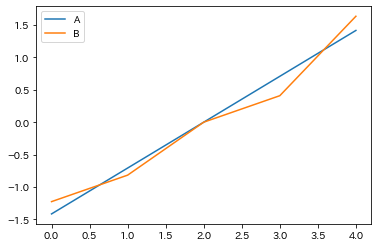

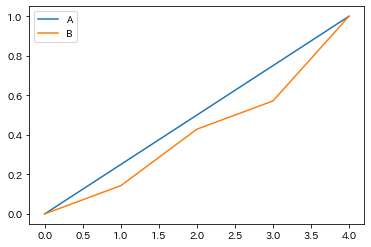

In [59]:
# ----------------------------------------
# 特徴量の正規化
# ----------------------------------------
df = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [100, 200, 400, 500, 800]
})
# > (1) 分散正規化
# >     - 平均が0、標準偏差が1となるように変換すること。正規化の対象が「かたより」と「ばらつき」
# >     - 統計学の教科書では「標準化」と表現される。他にはZ変換などとも呼ばれる。
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
stdsc.fit(df)
a = stdsc.transform(df)
print('standard scaled : \n', a)
pd.DataFrame(a, columns=['A', 'B']).plot()
# > (2) 最大最小正規化
# >     - 最小値が0、最大値が0になるように変換する（割合にする）こと。
# >     - 正規化の対象が「最大値」と「最小値」。よく言われる正規化はこちらの気がする。
from sklearn.preprocessing import MinMaxScaler
mmsc = MinMaxScaler()
mmsc.fit(df)
a = mmsc.transform(df)
print('min max scaled : \n', a)
pd.DataFrame(a, columns=['A', 'B']).plot()

In [60]:
# ========================================
# 4.4.2. 分類
# > (1) サポートベクタマシン(SVM)
# > (2) 決定木(DecisionTree)
# > (3) ランダムフォレスト(RandomForest)
# ========================================
# * Tips
# * - データセットを学習用とテスト用に分割するのが一般的
# * - これを複数回繰り返すのが交差検証(Cross Validation)
# * - sklearnは学習がfitメソッド、予測がpredictメソッド
# ----------------------------------------
# データセットを準備する
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target
print('X feature names: \n', iris.feature_names)
print('X (head 5 lines): \n', X[:5, :])
print('X target names: \n', iris.target_names)
print('y (head 5 elements): \n', y[:5])
# データセットを分割する
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
print('X_train shape : ', X_train.shape)
print('X_test shape : ', X_test.shape)
print('y_train shape : ', y_train.shape)
print('y_test shape : ', y_test.shape)

X feature names: 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X (head 5 lines): 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
X target names: 
 ['setosa' 'versicolor' 'virginica']
y (head 5 elements): 
 [0 0 0 0 0]
X_train shape :  (105, 4)
X_test shape :  (45, 4)
y_train shape :  (105,)
y_test shape :  (45,)


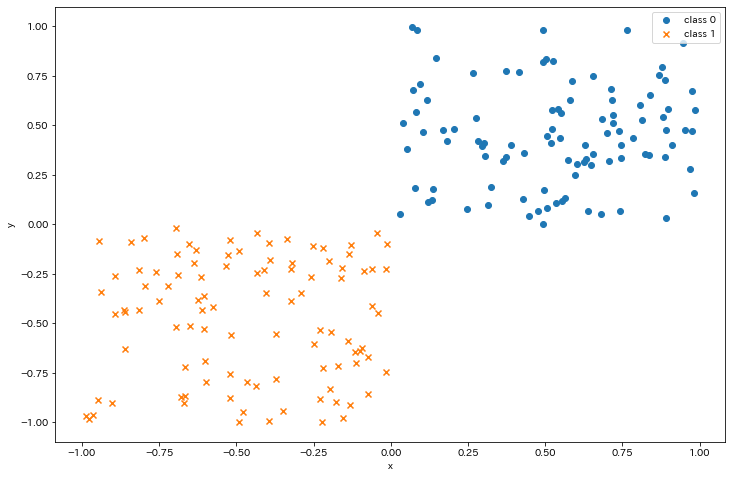

In [61]:
# ----------------------------------------
# 4.4.2 (1) SVM
# ** tips
#    - 分類、回帰、外れ値検出などいろいろ使える
#    - 線形分離不可能なデータにカーネルトリックを適用して線形分離可能な問題に落とし込む
#    - 境界のことを「決定境界」、各クラスのデータを「サポートベクタ」、クラス間のサポートベクタの距離を「マージン」と呼ぶ
#    - マージンを最大にする決定境界を選択するアルゴリズムである
# ----------------------------------------
# X軸 Y軸 ともに0～1までの一様分布から100点をサンプリング
X0 = np.random.uniform(size=(100, 2))
# クラス0のラベルを100個作成
y0 = np.repeat(0, 100)
# X軸 Y軸 ともに-1～0までの一様分布から100点をサンプリング
X1 = np.random.uniform(-1.0, 0.0, size=(100, 2))
# クラス0のラベルを100個作成
y1 = np.repeat(1, 100)
# 散布図にプロット
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(X0[:,0], X0[:,1], marker='o', label='class 0')
ax.scatter(X1[:,0], X1[:,1], marker='x', label='class 1')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()

In [62]:
from sklearn.svm import SVC
# 学習, 及び決定境界、マージン、サポートベクタを可視化する関数
def plot_boundary_margin_sv(X0, y0, X1, y1, kernel, C, xmin=-1, xmax=1, ymin=-1, ymax=1):
    # svc instance
    svc = SVC(kernel=kernel, C=C)
    # fitting
    svc.fit(np.vstack((X0, X1)), np.hstack((y0, y1)))
    # plotting input data
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.scatter(X0[:,0], X0[:,1], marker='o', label='class 0')
    ax.scatter(X1[:,0], X1[:,1], marker='x', label='class 1')
    # plotting boundary, margin
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
    xy = np.vstack([xx.flatten(), yy.flatten()]).T
    p = svc.decision_function(xy).reshape((100, 100))
    ax.contour(xx, yy, p, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    # plotting support vector
    ax.scatter(
        svc.support_vectors_[:, 0],
        svc.support_vectors_[:, 1],
        s=250, facecolors='none',
        edgecolors='black'
    )
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(loc='best')
    plt.show()

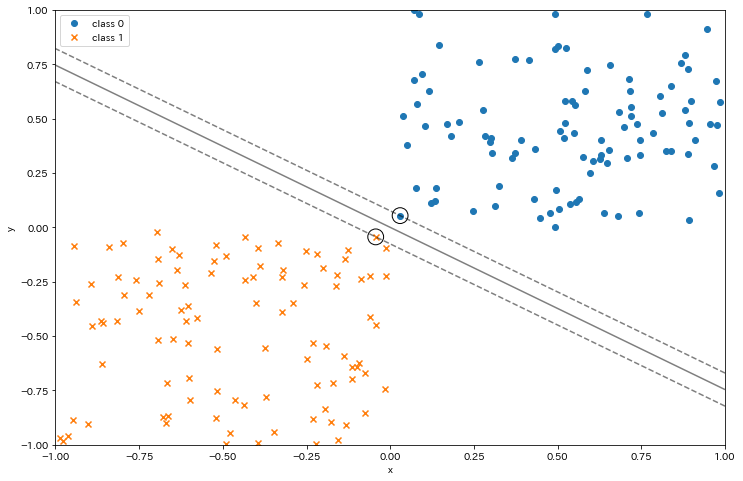

In [63]:
# 学習, 及び決定境界、マージン、サポートベクタを可視化
# ** tips : Cが小さいほどマージンは広くなる
plot_boundary_margin_sv(X0, y0, X1, y1, kernel='linear', C=1e6)

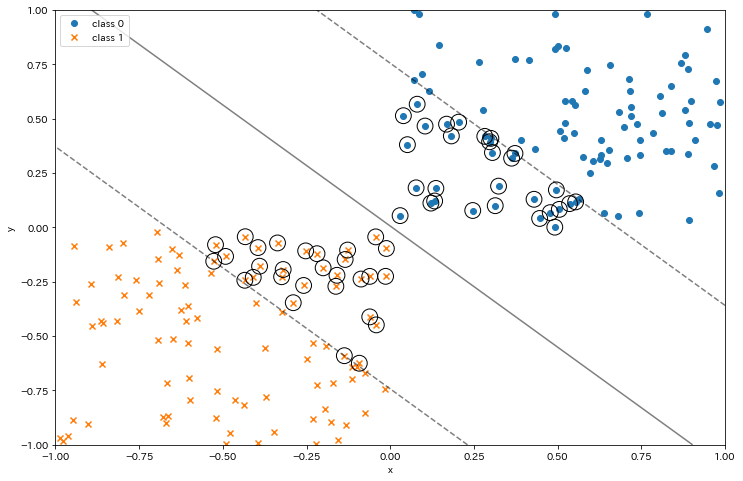

In [64]:
# C = 0.1としたとき (前の例よりCが小さい＝マージンは広くなる)
plot_boundary_margin_sv(X0, y0, X1, y1, kernel='linear', C=0.1)

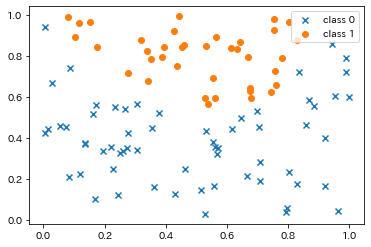

In [65]:
# 2次元空間における直線で分離不可能なサンプルにしてみる
X = np.random.random(size=(100, 2))
y = (X[:, 1] > 2*(X[:, 0]-0.5)**2 +0.5).astype(int)
fig, ax = plt.subplots()
ax.scatter(X[y == 0, 0], X[y ==0, 1], marker='x', label='class 0')
ax.scatter(X[y == 1, 0], X[y == 1, 1], marker='o', label='class 1')
ax.legend()
plt.show()

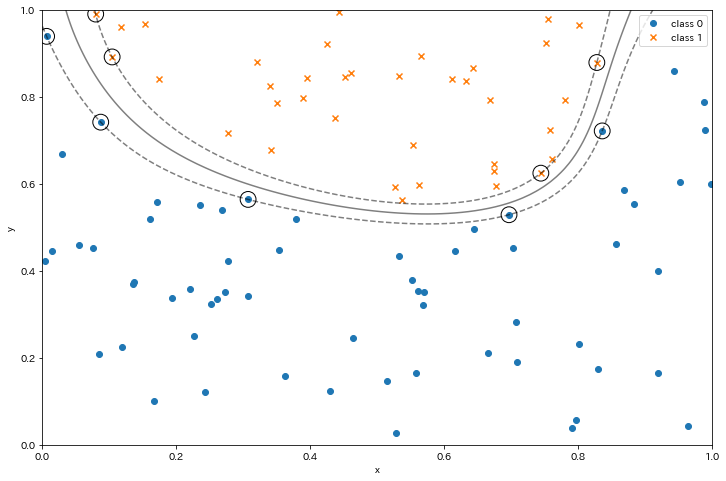

In [66]:
# 決定境界、マージン、サポートベクタをプロット
X0, X1 = X[y == 0, :], X[y == 1, :]
y0, y1 = y[y == 0], y[y == 1]
plot_boundary_margin_sv(X0, y0, X1, y1, kernel='rbf', C=1e3, xmin=0, ymin=0)

In [67]:
# ----------------------------------------
# 4.4.2 (2) 決定木 Decision Tree
# ** basic tips
#    - Tree 構造のモデル。理解しやすいので実務でも多用される。
#    - ノードとエッジで構成される。ノードはさらに相対的な位置関係に基づいて親ノード、子ノードと表現される
#    - 親を持たない親ノードを根ノード、子を持たない葉ノードと呼ぶ
#    - ポエム: 木で表現したいのか、家系図で表現したいのか、どっちかにしてほしいんだが。
# ** applied tips
#    - 「どの特徴量をどの値で分割するか」は、情報利得(information gain)が正になるように決める
#    - information gain とは、分割することにより、どれだけきれいになるかという指標。逆にどれだけ汚くないかともいえる。
#    - ここで不純度という概念を導入する。「クラスが如何に混在しているか」という概念である。
#    - データを分割することで不純度が下がるようにする。＝ 親ノードの不純度 > 子ノードの不純度
#    - 不純度の指標：ジニ不純度、エントロピー、分類誤差
#    - ここでは、sklearnのデフォルトであるジニ係数を使う
# ** Gini’s Diversity Index > ジニ不純度、ジニ多様性指標（←こっちのがしっくりくる表現）
#    - 一言で言えば、各ノードに間違ったクラスが振り分けられてしまう確率である
#    - 計算式：1 - (各クラスのデータが存在する確率の二乗の総和)
# ----------------------------------------
from sklearn.tree import DecisionTreeClassifier
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
dtc = DecisionTreeClassifier(max_depth=3)
# 学習
model = dtc.fit(X_train, y_train)
print(model)
# 予測
y_pred = dtc.predict(X_test)
# accuracy score
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print('accuracy score : \n', score)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
accuracy score : 
 0.9333333333333333


In [68]:
# ----------------------------------------
# 4.4.2 (3) ランダムフォレスト Random Forest
#    - ランダムに選んだ特徴量で決定「木」を複数作り
#    - それらの推定結果の多数決や平均値により分類・回帰を行う
#    - ランダムに作成した決定「木」の集合（アンサンブル）であるため、ランダムフォレストという
#    - ここで、ランダムに作成した決定木のことを「ブートストラップデータ」という
#    - ここで、複数の学習器を用いた学習方法を「アンサンブル学習」という
# ----------------------------------------
# 100個の決定木を使ってアンサンブル学習する
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=123)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
score = accuracy_score(y_test, y_pred)
print('accuracy score : \n', score)

accuracy score : 
 0.9333333333333333


Root Mean Squared Error : 
 5.329714327288867


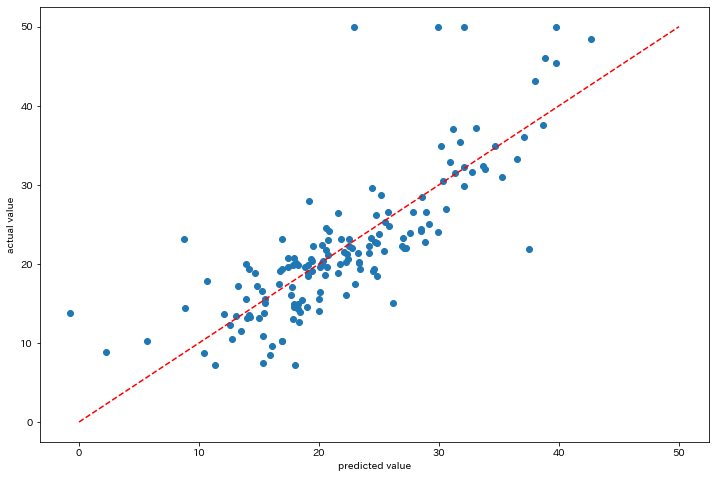

In [69]:
# ========================================
# 4.4.3. 回帰
# > (1) 線形回帰（最尤法や最小二乗法など）説明変数が1個＝単回帰、2個以上＝重回帰
# ========================================
# ** comment
#      - 本書では線形回帰しか紹介されていないが、
#      - 分類で用いた SVM, DT, RF の Regressor クラスがある。それを使えば回帰もできる
# ----------------------------------------
# Bostonの住宅価格データセットを用いて線形回帰を試してみる
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
# prepare datasets
boston = load_boston()
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
lr = LinearRegression()
# fitting
lr.fit(X_train, y_train)
# prediction
y_pred = lr.predict(X_test)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : \n', rmse)
# visualizing results
# 横軸を予測値、縦軸を正解値とする散布図をプロットする
# 両者が同一値であれば傾き1のライン（下図赤点線）上に乗る
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(y_pred, y_test)
ax.plot((0, 50), (0, 50), linestyle='dashed', color='red')
ax.set_xlabel('predicted value')
ax.set_ylabel('actual value')
plt.show()

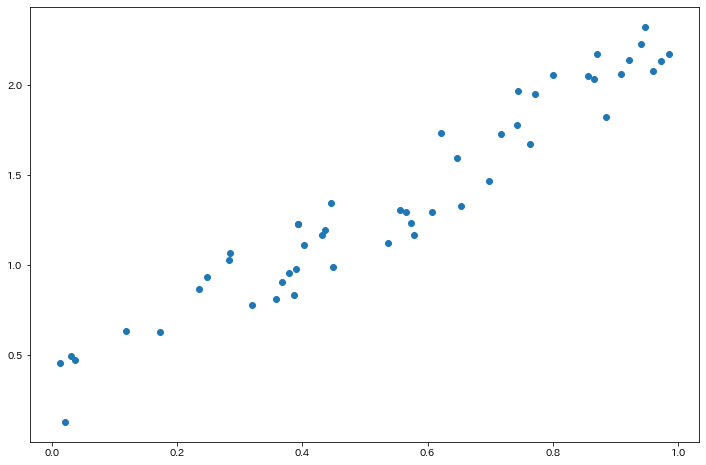

In [70]:
# ========================================
# 4.4.4. 次元削減
# > (1) 主成分分析(PCA)
# >   - 基本的には固有値分解を行い（複数の固有値とそれに対応する固有ベクトルが生成される）
# >   - 固有値が大きい固有ベクトルがサンプルをよく表す特徴と考え、
# >   - 固有値が最も大きい固有ベクトルから順に特徴量として採用していく
# >   - 固有ベクトルは線形独立であることは数学的に保証されている。
# >   - 固有値の小さい固有ベクトルは重要でない指標と考え無視する＝圧縮対象の次元とする
# ========================================
# 0以上1未満の一様乱数を50個生成, 2倍にした後, 一様乱数を0.5倍した値を足す
# だいたい y = 2x + 0.25 付近に散らばる50個の点を生成することができる
X = np.random.random(size=50)
Y = 2 * X + 0.5 * np.random.rand(50)
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(X, Y)
plt.show()

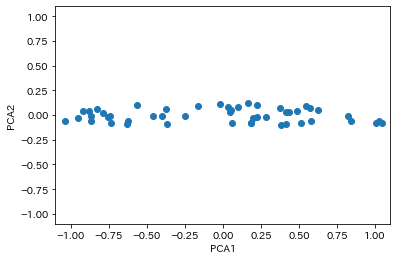

In [71]:
# 固有値の大きい上位2つの固有ベクトルを主成分として採用
# 第一主成分と第二主成分と呼ぶ
# もとが2次元のデータなので、この時点では次元削減していない。ただ軸を変えるだけといったイメージ
from sklearn.decomposition import PCA
# PCA を実行
pca = PCA(n_components=2)
X_pca = pca.fit_transform(np.hstack((X[:, np.newaxis], Y[:, np.newaxis])))
# 新たな二軸で解釈したデータをプロットする
fig, ax = plt.subplots()
ax.scatter(X_pca[:, 0], X_pca[:, 1])
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
# 第一主成分の方向にしか広がっていない
# 次元を削減できそう。PCA1だけでこのデータをだいたい表現できそう、と判断することができる
plt.show()

In [72]:
# ========================================
# 4.4.5. モデルの評価
# > (1) カテゴリの分類精度 (分類モデル)
# > (2) 予測確率の正確さ
# ========================================
# > (1) カテゴリの分類精度 (分類モデル)
# ** tips
#   - True/False: 予測が当たった(True)か外れた(False)かという概念
#   - Positive/Negative: (実績値であれ予測値であれ)正例である(P)か負例(N)であるかという概念
# ----------------------------------------
#   - 適合率 Precision: 正例と予測した結果の一致率
#   - 再現率 recall:    実績の正例を予測によって再現できた割合
#   - 正解率 accuracy:  予測と実績の一致率
#   - F値 F-Value:     適合率と再現率の調和平均, 適合率と再現率をバランスよく保ちたい時に利用する
#   - * 適合率と再現率はトレードオフ
# ----------------------------------------
# IrisのSVM分類器の分類精度を出力する
X, y = iris.data[:100, :], iris.target[:100]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
# 評価 (適合率・再現率・F値を出力)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [73]:
# ----------------------------------------
# 交差検証
# ** Tips
#   - k分割交差検証:「k個に分割して、一つをテスト用それ以外を学習用にする」をk回繰り返す
#   - 層化k分割交差検証:目的変数のクラスの割合が一定となるようにしたk分割交差検証
# ----------------------------------------
# IrisのSVM分類器を10分割交差検証で作る
# ハイパーパラメータの最適化と合わせて使うことが多い
from sklearn.model_selection import cross_val_score
svc = SVC()
cross_val_score(svc, X, y, cv=10, scoring='precision')

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [74]:
# ----------------------------------------
# > (2) 予測確率の正確さ
# ** Tips
#   - ROCとは？: mathwords.net/auc
#   - AUCとは？: mathwords.net/auc
# ** Case
#   - 2クラス分類問題をターゲットにしている。
#   - 入力を元に「正例になる確率の予測値」（以下、正例の予測確率）までが出ていて、
#   - 「確率がXX以上の場合に正例、それ以下の場合に負例とする」みたいな【閾値】がまだ決まっていない状況
#   - ROCは、この【閾値】として妥当なものがどれなのかを可視化する手段と言える
# ----------------------------------------
# class0: 負例（退会しなかった）, class1: 正例（退会した）
withdraw_prob_preds = [0.98, 0.95, 0.90, 0.87, 0.85, 0.80, 0.75, 0.71, 0.63, 0.55, 0.51, 0.47, 0.43, 0.38, 0.35, 0.31, 0.28, 0.24, 0.22, 0.19, 0.15, 0.12, 0.08, 0.04, 0.01]
withdraw_actual = [1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0]
df = pd.DataFrame({'予測退会確率': withdraw_prob_preds, '実績(0:退会してない/1:退会した)': withdraw_actual})
df

,予測退会確率,実績(0:退会してない/1:退会した)
0,0.98,1
1,0.95,1
2,0.90,0
3,0.87,1
4,0.85,0
5,0.80,0
6,0.75,1
7,0.71,1
8,0.63,1
9,0.55,0


偽陽性率: 
 [0.         0.         0.         0.07142857 0.07142857 0.21428571
 0.21428571 0.35714286 0.35714286 0.57142857 0.57142857 0.71428571
 0.71428571 0.85714286 0.85714286 1.        ]
真陽性率: 
 [0.         0.09090909 0.18181818 0.18181818 0.27272727 0.27272727
 0.54545455 0.54545455 0.63636364 0.63636364 0.81818182 0.81818182
 0.90909091 0.90909091 1.         1.        ]


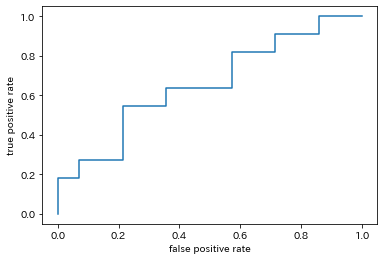

In [75]:
# ----------------------------------------
# ** About ROC
#   - 正例の予測確率が高い順にデータを並べ替え、
#   - 各予測確率に対して、「もしこれを閾値にしたとしたら、偽陽性割合と真陽性割合はいくらになるか？」をプロットしたものがROC
#   - ROCは横軸に偽陽性率、縦軸に真陽性率とし、正例予測確率の低い順に左からプロットするのが一般的。故に、右肩上がりのグラフになる。
# ----------------------------------------
from sklearn.metrics import roc_curve
labels = df['実績(0:退会してない/1:退会した)'].values
probs = df['予測退会確率'].values
# 偽陽性率, 真陽性率, 閾値を算出
fpr, tpr, threshold = roc_curve(labels, probs)
print('偽陽性率: \n', fpr)
print('真陽性率: \n', tpr)
fig, ax = plt.subplots()
ax.step(fpr, tpr)
ax.set_xlabel('false positive rate')
ax.set_ylabel('true positive rate')
plt.show()

In [76]:
# ----------------------------------------
# ** About AUC
#   - ROC曲線下部の面積（積分値）と定義される
#   - 1.0に近づく程良いモデル。0.5に近づく程悪いモデル
#   - 1.0に近づく＝確率の大きさによって正例と負例を区別できている。確率の大小が正負例の区別に大きく寄与している。
#   - 0.5に近づく＝確率の大きさに依らず正負例がある。ランダムといっても過言ではない。その確率値にあまり意味がない。
# ----------------------------------------
from sklearn.metrics import roc_auc_score
ras = roc_auc_score(labels, probs)
print('roc auc score: ', ras)

roc auc score:  0.6558441558441558


In [77]:
# ========================================
# 4.4.6. ハイパーパラメータ最適化
# > (1) GridSearch <--本書で取り扱う
# > (2) RandomSearch
# ** comment: optuna使いたい
# ** Tips:
#   - ハイパーパラメータ：学習対象のパラメータより上位のパラメータ。例えば学習器自体のパラメータ（決定木の深さなど）
#   - ハイパーパラメータ最適化＋分割交差検証は一緒に使われるのが一般的
# ========================================
# Irisデータを決定木で分類するケースにおいて決定木の最適な深さをGridSearch(+10分割交差検証)により求める
from sklearn.model_selection import GridSearchCV
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
# - 決定木のインスタンス化
dtc = DecisionTreeClassifier()
# - GridSearch + 10分割交差検証（各ハイパーパラメータにて10分割交差検証する）
param_grid = {'max_depth': [3, 4, 5]}  # ハイパーパラメータの引数をキーとした辞書型
gs_cv = GridSearchCV(dtc, param_grid=param_grid, cv=10)
gs_cv.fit(X_train, y_train)
# - 最適なハイパーパラメータ(ここでは決定木の深さ)を確認
print('Best Hyper Parameters with GridSearch: \n', gs_cv.best_params_)
# - 最適なハイパーパラメータ(ここでは決定木の深さ)によるモデルを確認
print('Best Model with Best Hyper Parameters: \n', gs_cv.best_estimator_)
# - 最適なモデルで推定する
y_pred = gs_cv.predict(X_test)
score = accuracy_score(y_test, y_pred)
print('accuracy score : \n', score)

Best Hyper Parameters with GridSearch: 
 {'max_depth': 4}
Best Model with Best Hyper Parameters: 
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
accuracy score : 
 0.9333333333333333


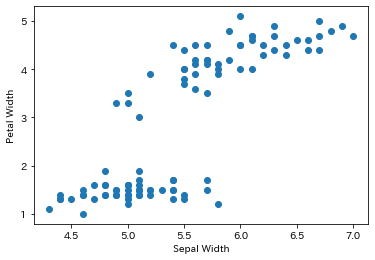

In [78]:
# ========================================
# 4.4.7. クラスタリング
# > (1) k-means クラスタリング
# > (2) 階層的クラスタリング
# ========================================
# > (1) k-means クラスタリング
#     1. 各サンプルにランダムにクラスラベリング
#     2. 各クラスのデータ中心をそのクラスの中心とする
#     3. 各サンプルについて、最も近くにあるクラス中心のクラスを新たにそのサンプルのクラスラベルとする
#     4. 2->3 を繰り返し、各サンプルのクラスラベル更新がなくなれば終了
# ----------------------------------------
# Irisデータの上から100個を対象、その内「がく長さ」「花びら長さ」を利用して二次元情報とする
# まずは対象データをプロットする
data = iris.data
# 1, 3列目を抽出（「がく長さ」「花びら長さ」）
X = data[:100, [0, 2]]
# plotting
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1])
ax.set_xlabel('Sepal Width')
ax.set_ylabel('Petal Width')
plt.show()

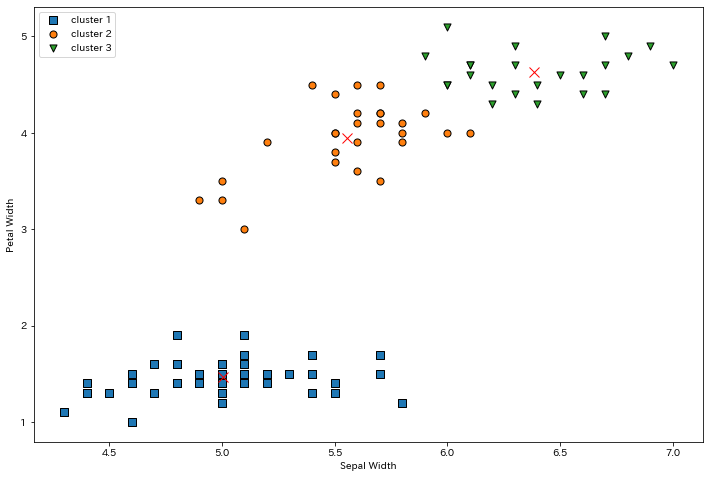

In [82]:
# クラスタ数k=3 としてk-meansを実行
from sklearn.cluster import KMeans
# 初期値をrandomではなく、'k-means++'にしてみる。これにより初期値のクラスが離れた位置になる
#km = KMeans(n_clusters=3, init='random', n_init=10, random_state=123)
km = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=123)
y_km = km.fit_predict(X)
# 各クラスタの中心とサンプル群をプロットする
def plot_clusters(ax, n_cluster_idx, marker, y_km):
    # 散布図(クラスタ1)
    ax.scatter(
        X[y_km == n_cluster_idx, 0], 
        X[y_km == n_cluster_idx, 1], 
        s=50, edgecolor='black',
        marker=marker, label='cluster ' + str(n_cluster_idx + 1)
    )
    # クラスタ中心(クラスタ1)
    ax.plot(
        np.mean(X[y_km == n_cluster_idx, 0]),
        np.mean(X[y_km == n_cluster_idx, 1]),
        marker='x', markersize=10, color='red')
# plotting
fig, ax = plt.subplots(figsize=(12, 8))
markers = ['s', 'o', 'v']
for i, m in enumerate(markers):
    plot_clusters(ax, i, m, y_km)
ax.set_xlabel('Sepal Width')
ax.set_ylabel('Petal Width')
ax.legend()
plt.show()

In [88]:
# ----------------------------------------
# > (2) 階層的クラスタリング
#     1. 凝集型：似ているものを徐々に集めていき、最終的に大きなクラスタを作る <- 本書ではこちら
#     2. 分割型：全てが一つのクラスタと仮定して開始し、分けられるものを徐々に分割していく
# ----------------------------------------
# sklearnで凝集型の階層的クラスタリングをする場合、さらに
# 距離の定義(affinity)、結び付けのルール(linkage)を定める必要がある。
# 
# ここでは、距離：ユークリッド距離、結び付けルール：最長距離法 を利用する
# 
# 最長距離法とは、二つのクラスタをまとめるとき、各クラスタに存在するサンプル間距離の内最も遠いものを
# クラスタ間距離とする方法である。
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
# クラスタリングと予測の実行
labels = ac.fit_predict(X)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0])

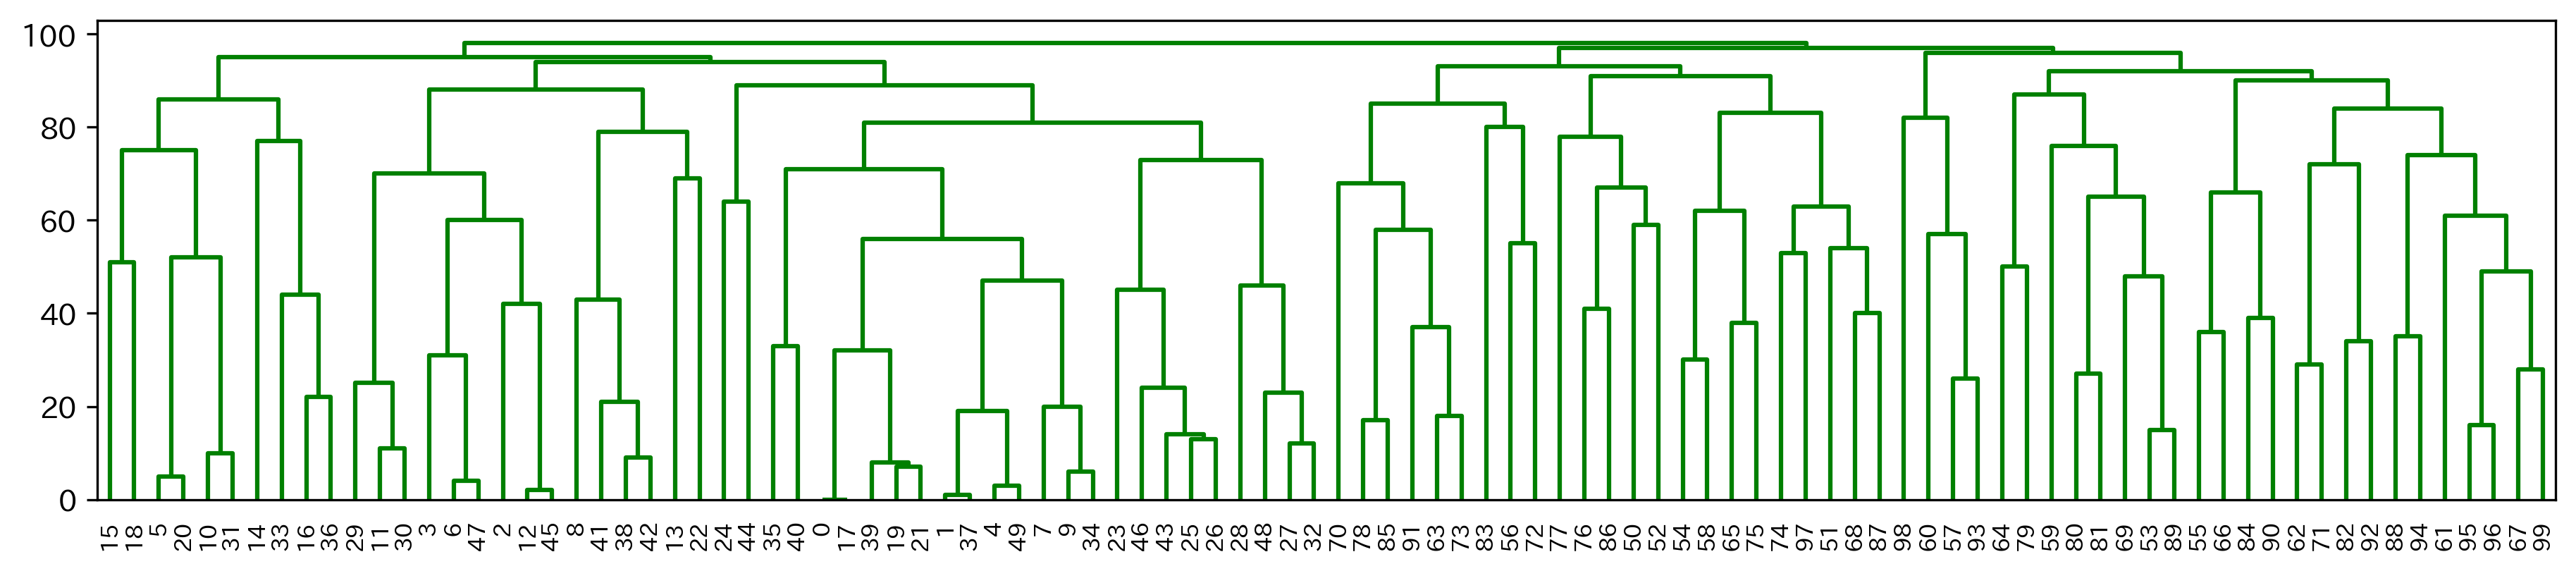

In [89]:
# 結果を樹形図で表示する
from scipy.cluster.hierarchy import dendrogram
# 子クラスとの関係を抽出
children = ac.children_
# クラスタ間の距離を抽出
distance = np.arange(children.shape[0])
# 各データの観測番号
no_of_observations = np.arange(2, children.shape[0]+2)
# 子クラスタ、クラスタ間の距離、観測番号を列方向に結合
linkage_matrix = np.hstack((children, 
                distance[:, np.newaxis],
                no_of_observations[:, np.newaxis])).astype(float)
# 樹形図をプロット
fig, ax = plt.subplots(figsize=(15, 3), dpi=300)
dendrogram(linkage_matrix, labels=np.arange(100), leaf_font_size=8, color_threshold=np.inf)
plt.show()

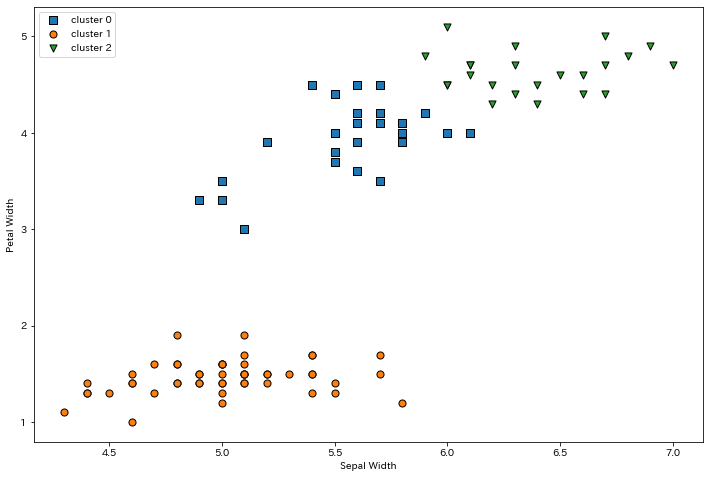

In [91]:
# クラスタリング結果をplotする
fig, ax = plt.subplots(figsize=(12, 8))
df = pd.DataFrame(X, columns=['SepalWid', 'PetalWid'])
df['label'] = labels
markers = ['s', 'o', 'v']
for i, m in enumerate(markers):
    cur_X = df.query('label == @i')
    ax.scatter(
        cur_X['SepalWid'].values,
        cur_X['PetalWid'].values,
        s=50, edgecolor='black',
        marker=m, label='cluster ' + str(i)
    )
ax.set_xlabel('Sepal Width')
ax.set_ylabel('Petal Width')
ax.legend()
plt.show()